In [58]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from slab_model import slab_model

In [59]:
from scipy.io import loadmat

data = loadmat("data/NIKEdata_PACSN_RiB_RiG_newMLD.mat")
matlab = loadmat("data/matlab_output.mat")

In [60]:
latitude = 10

time = data["time"][0]
time = (time-time.min())*86400

H = matlab["H"].T[0]
wind_stress = (data["taux"][0]+1j*data["tauy"][0])

In [87]:
slab = slab_model(time,wind_stress,H,latitude,
                  Zi0=matlab["ZiP"].T[0][0],
                  rho0=1025,ni_band=[0.8,1.2],drag=0.15
)
slab

<xarray.Dataset>
Dimensions:               (time: 12054, frequency: 2000)
Coordinates:
  * time                  (time) float64 0.0 3.603e+03 ... 4.342e+07 4.343e+07
  * frequency             (frequency) float64 0.0 6.939e-08 ... 0.0001387
Data variables:
    Zi                    (time) complex128 (-0.014058737933308911-0.03307175...
    Tw                    (time) complex128 (-4.5462126517233836e-05+8.239710...
    Zif                   (time) complex128 (0.008063246858697122+0.002773396...
    Twf                   (time) complex128 (6.8978585787695565e-06+1.2211799...
    H                     (time) float64 25.0 25.0 25.0 25.0 ... nan nan nan nan
    wind_work             (time) float64 9.172e-05 4.732e-05 ... nan nan
    near_inertial_filter  (frequency) float64 3.409e-15 2.657e-09 ... 4.255e-20
Attributes:
    ip:        248099.6378933182
    drag:      0.15
    f:         2.5325249809035713e-05
    latitude:  10
    dt:        3602.8800000011856
    ni_band:   [0.8, 1.2]

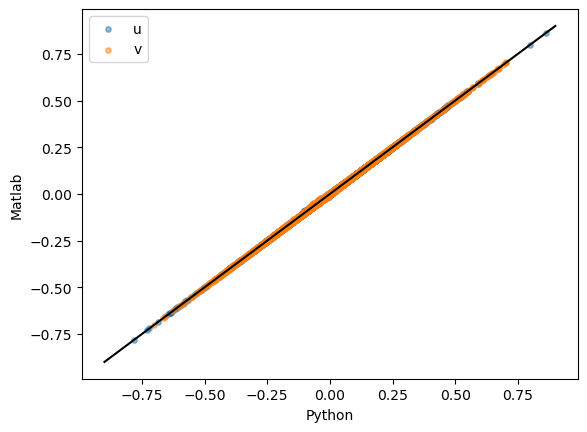

In [69]:
fig,ax = plt.subplots()
ax.plot([-0.9,0.9],[-0.9,0.9],"-k")
ax.scatter(slab.Zi.real,matlab["ZiP"].real,s=15,alpha=0.5, label = "u")
ax.scatter(slab.Zi.imag,matlab["ZiP"].imag,s=15,alpha=0.5, label = "v")
ax.set(xlabel = "Python", ylabel = "Matlab")
ax.legend()

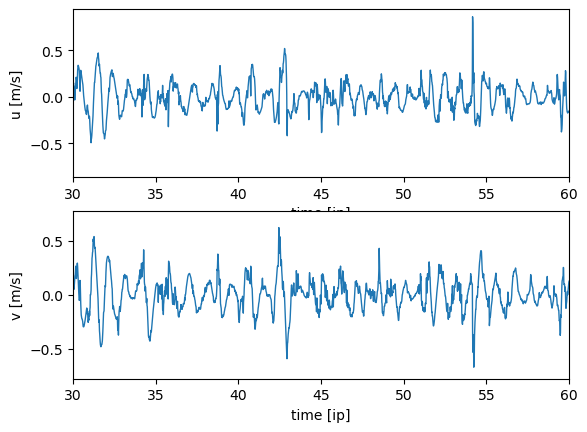

In [85]:
fig,ax = plt.subplots(2,1)

ax[0].plot(slab.time/slab.ip, slab.Zi.real, lw = 1)
ax[1].plot(slab.time/slab.ip, slab.Zi.imag, lw = 1)

for a, label in zip(ax, ["u [m/s]", "v [m/s]"]):
    a.set(xlim=[30,60], ylabel = label, xlabel = "time [ip]")

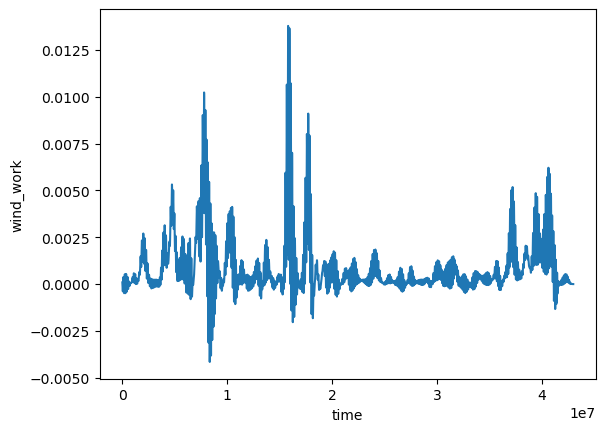

In [88]:
slab.wind_work.plot()

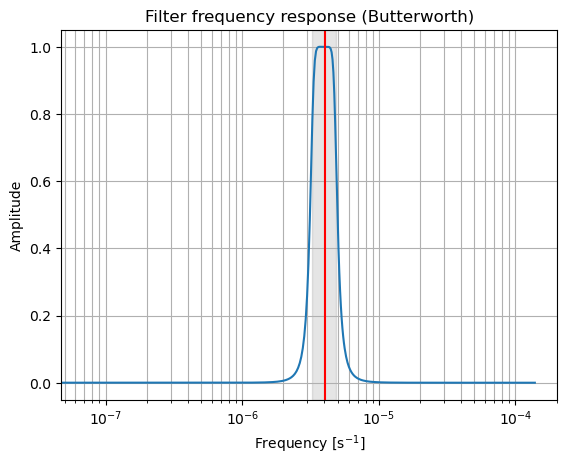

In [63]:
fig,ax = plt.subplots()
slab.near_inertial_filter.plot(ax=ax)
ax.set(
    title='Filter frequency response (Butterworth)',
    xlabel='Frequency [s$^{-1}$]',
    ylabel='Amplitude',
    xscale="log"
)
ax.grid(which='both', axis='both')
ax.axvline(slab.f/(2*np.pi), color='red')
ax.axvspan(*(np.array(slab.ni_band) * slab.f / (2 * np.pi)), color='k',alpha=0.1)



In [ ]:
plt.style.use('project.mplstyle')

data = loadmat("../data/external/tests/NIKEdata_PACSN_RiB_RiG_newMLD.mat")
matlab = loadmat("../data/external/tests/matlab_output.mat")


latitude = 10

time = data["time"][0]
time = (time-time.min())*86400

H = matlab["H"].T[0]
wind_stress = (data["taux"][0]+1j*data["tauy"][0])


#test numerical methods
slab0 = slab_model(time,wind_stress,H,10,
                  Zi0=matlab["ZiP"].T[0][0],
                  rho0=1025,ni_band=[0.8,1.2],drag=0.15,
                  numerical_method=0
)
slab1 = slab_model(time,wind_stress,H,10,
                  Zi0=matlab["ZiP"].T[0][0],
                  rho0=1025,ni_band=[0.8,1.2],drag=0.15,
                  numerical_method=1
)

fig,ax = plt.subplots(3,1)
fig.subplots_adjust(hspace=0.8)

ax[0].scatter(slab0.Zi.real, slab1.Zi.real, s=5, alpha=0.5, edgecolor=None, label="u")
ax[0].scatter(slab0.Zi.imag, slab1.Zi.imag, s=5, alpha=0.5, edgecolor=None, label="v")
ax[0].plot([-1,1],[-1,1],"k")
ax[0].set(ylabel="D'Asaro [m/s]", xlabel="Forward Euler [m/s]")

ax[1].plot(slab0.time/slab0.ip,slab1.Zi.real,label="D'Asaro")
ax[1].plot(slab0.time/slab0.ip,slab0.Zi.real,label="Forward Euler")
ax[1].legend(ncol=2,fontsize=8)

ax[2].plot(slab0.time/slab0.ip,slab1.Zi.imag,label="D'Asaro")
ax[2].plot(slab0.time/slab0.ip,slab0.Zi.imag,label="Forward Euler")
ax[2].legend(ncol=2,fontsize=8)

ax[1].set(xlabel="time [ip]", ylabel="u [m/s]")
ax[2].set(xlabel="time [ip]", ylabel="v [m/s]")




slab = slab_model(time,wind_stress,H,10,numerical_method=0,
                  Zi0=matlab["ZiP"].T[0][0],
                  rho0=1025,ni_band=[0.8,1.2],drag=0.15
)

slab_pf = slab_model(time,wind_stress,H,10,numerical_method=1,
                  Zi0=matlab["ZiP"].T[0][0],
                  rho0=1025,ni_band=[0.8,1.2],drag=0.15,
                  wind_work_method='Plueddemann and Farrar (2006)'
)

fig,ax = plt.subplots()
slab.Zi.real.plot()
slab.Zi.imag.plot()


fig,ax = plt.subplots()
ax.plot([-0.9,0.9],[-0.9,0.9],"-k")
ax.scatter(slab.Zi.real,matlab["ZiP"].real,s=15,alpha=0.5)
ax.scatter(slab.Zi.imag,matlab["ZiP"].imag,s=15,alpha=0.5)


fig,ax = plt.subplots(2,1)
ax[0].plot(slab.time/slab.ip,slab.Zi.real)
ax[0].plot(slab.time/slab.ip,matlab["ZiP"].real,alpha=0.8)
ax[1].plot(slab.time/slab.ip,slab.Zi.imag)
ax[1].plot(slab.time/slab.ip,matlab["ZiP"].imag,alpha=0.8)
for a in ax:
    a.set(xlim=[30,60])

dif = xr.DataArray(
    np.sqrt((slab.Zi-matlab["ZiP"].T[0]).real**2)+
    1j*np.sqrt((slab.Zi-matlab["ZiP"].T[0]).imag**2)
)
dif.name = "dif"
d = 1e-2
bins = np.arange(0,0.5+d,d)
fig,ax = plt.subplots()
histogram(dif.real,bins=bins).plot(ax=ax)
histogram(dif.imag,bins=bins).plot(ax=ax)



fig,ax = plt.subplots()
slab.near_inertial_filter.plot(ax=ax)
ax.set(
    title='Filter frequency response (Butterworth)',
    xlabel='Frequency [s$^{-1}$]',
    ylabel='Amplitude',
    xscale="log"
)
ax.grid(which='both', axis='both')
ax.axvline(slab.f/(2*np.pi), color='red')
ax.axvspan(*(np.array(slab.ni_band) * slab.f / (2 * np.pi)), color='k',alpha=0.1)




fig,ax = plt.subplots(2,1)
ax[0].plot(time,slab.Tw.real)
ax[0].plot(time,slab.Tw.imag)
ax[1].plot(time,slab.Twf.real)
ax[1].plot(time,slab.Twf.imag)

fig,ax = plt.subplots(2,1)
ax[0].plot(time,slab.Zi.real)
ax[0].plot(time,slab.Zi.imag)
ax[1].plot(time,slab.Zif.real)
ax[1].plot(time,slab.Zif.imag)


mIIP = xr.DataArray(
    matlab["IIP"][0],
    dims="time",coords={"time":("time",time)}
)

window = int(4/(slab.dt/slab.ip))
fig,ax = plt.subplots()
ax.plot(slab.time/slab.ip,mIIP.rolling(time=window,center=True).mean(),label="Matlab_PF2006",color="0.4")
ax.plot(slab.time/slab.ip,slab_pf.wind_work.rolling(time=window,center=True).mean(),label="Python_PF2006")
ax.plot(slab.time/slab.ip,slab.wind_work.rolling(time=window,center=True).mean(),label="Python_Majumder2015")
ax.legend(title="4-ip running average")
ax.set(title="D'Asaro", ylabel="Wind Work$~$ $\Pi_w$ [W$\,$m$^{-2}$]", xlabel="time [ip]")
fig.savefig("../img/wind_work_forward_dasaro.png")



fig,ax = plt.subplots()
ax.scatter(
    slab_pf.wind_work.rolling(time=window,center=True).mean(),
    mIIP.rolling(time=window,center=True).mean()
)
ax.set(
    xlim=[0,0.005],
    ylim=[0,0.005]
)

props = [slab.Tw,slab.Twf,slab.Zi,slab.Zif]

fig,ax = plt.subplots(len(props),1)

for a,p in zip(ax,props):
    p = p.values
    
    p = p[~np.isnan(p)]
    
    P = np.fft.fft(p.real)
    freq = np.fft.fftfreq(p.size,d=slab.dt)

    P = np.fft.fftshift(P)
    freq = np.fft.fftshift(freq)
    
    a.loglog(freq,np.abs(P))
    
    P = np.fft.fft(p.imag)
    freq = np.fft.fftfreq(p.size,d=slab.dt)

    P = np.fft.fftshift(P)
    freq = np.fft.fftshift(freq)

    a.loglog(freq,np.abs(P))
    a.axvline(slab.f/(2*np.pi), color='red')
    a.axvspan(*(np.array(slab.ni_band) * slab.f / (2 * np.pi)), color='k',alpha=0.1)